In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skmetrics
import sklearn.model_selection as skmodel
from sklearn import linear_model

nbaDf = pd.read_csv('nbaRookies.csv')

print(nbaDf)

                       Name  GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  \
0            Brandon Ingram  36  27.4   7.4  2.6   7.6  34.7      0.5  2.1   
1           Andrew Harrison  35  26.9   7.2  2.0   6.7  29.6      0.7  2.8   
2            JaKarr Sampson  74  15.3   5.2  2.0   4.7  42.2      0.4  1.7   
3               Malik Sealy  58  11.6   5.7  2.3   5.5  42.6      0.1  0.5   
4               Matt Geiger  48  11.5   4.5  1.6   3.0  52.4      0.0  0.1   
5              Tony Bennett  75  11.4   3.7  1.5   3.5  42.3      0.3  1.1   
6               Don MacLean  62  10.9   6.6  2.5   5.8  43.5      0.0  0.1   
7              Tracy Murray  48  10.3   5.7  2.3   5.4  41.5      0.4  1.5   
8              Duane Cooper  65   9.9   2.4  1.0   2.4  39.2      0.1  0.5   
9              Dave Johnson  42   8.5   3.7  1.4   3.5  38.3      0.1  0.3   
10           Corey Williams  35   6.9   2.3  0.9   2.4  36.5      0.0  0.1   
11                 Sam Mack  40   6.7   3.6  1.2   3.0  39.8    

<Figure size 432x288 with 0 Axes>

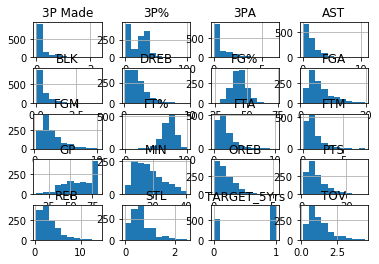

In [48]:
plt.figure()
nbaDf.hist()
plt.show()

In [49]:
pd.isna(nbaDf)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
nbaDf[pd.isna(nbaDf).any(axis=1)]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,...,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,...,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,...,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,...,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,...,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,...,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,...,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,...,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


In [51]:
nbaDf.fillna(0)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0.0
6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1.0
7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1.0
8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0.0
9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,21.4,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0.0


In [52]:
nbaFeatDf = nbaDf.drop(['Name', 'TARGET_5Yrs'], axis=1)
nbaLabelsDf = nbaDf[['TARGET_5Yrs']]

In [53]:
nbaTrainFeat, nbaTestFeat, nbaTrainLabels, nbaTestLabels = skmodel.train_test_split(nbaFeatDf, nbaLabelsDf, test_size=0.2)
print(nbaTrainFeat)
print(nbaTestFeat)
print(nbaTrainLabels)
print(nbaTestLabels)

      GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  \
468   62  14.2   5.6  2.1   4.4  48.5      0.0  0.0   0.0  1.4  2.4  57.1   
809   14   3.1   1.1  0.4   1.6  26.1      0.2  0.9  23.1  0.0  0.0   0.0   
827   29  21.2   5.8  2.2   4.8  45.7      0.1  0.5  28.6  1.3  1.8  71.2   
1076  45  13.3   3.1  1.0   2.8  36.3      0.5  1.5  35.8  0.6  0.9  67.5   
324   82  20.7   8.3  3.2   6.3  50.7      0.0  0.0   0.0  1.9  3.1  60.7   
1250  63  15.0   6.0  2.5   4.8  51.5      0.0  0.2  16.7  1.0  1.2  83.3   
567   53  13.7   4.1  1.6   4.0  41.2      0.0  0.1  33.3  0.8  1.2  68.3   
1244  67  21.8   9.2  3.1   6.9  44.3      1.0  2.6  39.2  2.1  2.9  71.4   
393   51   9.0   4.5  1.8   3.8  48.2      0.0  0.0   0.0  0.8  1.3  64.2   
944   41  12.4   3.0  1.1   3.2  35.4      0.2  0.7  30.0  0.5  0.7  81.5   
624   27   7.5   2.8  1.0   3.3  29.5      0.3  1.1  22.6  0.6  0.7  89.5   
1117  24   8.5   2.1  0.6   2.1  29.4      0.3  1.0  26.1  0.6  0.8  75.0   

In [54]:
nbaTrainFeat, nbaValFeat, nbaTrainLabels, nbaValLabels = skmodel.train_test_split(nbaTrainFeat, nbaTrainLabels, test_size=0.2)
print(nbaTrainFeat)
print(nbaValFeat)
print(nbaTrainLabels)
print(nbaValLabels)

      GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA    3P%  FTM  FTA    FT%  \
1310  81  34.9  18.2  6.2  13.1  47.4      0.0  0.5   10.0  5.7  6.8   83.5   
783   79  22.8   5.8  2.3   6.2  37.4      0.1  0.5   19.4  1.1  1.4   80.0   
1209  69  14.4   3.8  1.5   2.7  56.7      0.0  0.0    0.0  0.7  1.1   66.2   
1108  34  13.0   3.5  1.4   3.8  36.4      0.5  1.4   32.7  0.2  0.2  100.0   
1170  71  16.3   4.8  2.0   3.9  50.9      0.0  0.0    0.0  0.9  1.4   62.0   
529   39   8.5   3.5  1.4   2.6  52.4      0.0  0.0    0.0  0.7  1.2   60.4   
683   72  16.9   5.4  2.0   4.1  48.5      0.5  1.0   47.3  1.0  1.3   71.1   
886   57   8.5   2.3  0.8   1.7  45.4      0.0  0.0    0.0  0.8  1.2   60.6   
125   80  30.2  12.7  4.7  10.4  44.6      0.0  0.1    0.0  3.4  4.4   76.8   
570   54  12.4   5.6  2.1   4.6  46.2      0.1  0.2   30.0  1.3  1.8   73.7   
1185  65  21.2   6.3  1.9   5.4  35.2      0.8  2.4   31.4  1.8  3.0   59.1   
1032  72  21.9   9.5  3.9   9.0  43.0      0.1  0.5 

In [58]:
logRegNba = linear_model.LogisticRegression(C=10000, max_iter=100)

logRegNba.fit(nbaTrainFeat, nbaTrainLabels)

print(logRegNba.intercept_)
print(logRegNba.coef_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [57]:
predYLstat = logRegNba.predict(nbaTestFeat)

from sklearn.metrics import f1_score, accuracy_score
print(f1_score(nbaTestLabels, pred))
print(accuracy_score (nbaTestLabels, pred))

NotFittedError: This LogisticRegression instance is not fitted yet